<a href="https://colab.research.google.com/github/PritamKhan/Data_Analytics/blob/master/Assignment_SVM_%26_Navie_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Theoretical Question's**

1. What is a Support Vector Machine (SVM)
-> SVM is a supervised learning algorithm used for classification and regression. It finds the best boundary (hyperplane) that separates classes in the feature space.



2. What is the difference between Hard Margin and Soft Margin SVM

-> Hard Margin: No misclassifications allowed; used for perfectly separable data.
Soft Margin: Allows some misclassifications; better for real-world noisy data.



3. What is the mathematical intuition behind SVM
-> SVM maximizes the **margin** (distance) between the separating hyperplane and the nearest data points (support vectors) to improve generalization.



4. What is the role of Lagrange Multipliers in SVM
-> They help solve the constrained optimization problem of SVM by converting it into a dual problem that's easier to solve.



5. What are Support Vectors in SVM
-> They are the critical data points that lie closest to the decision boundary. They define the margin and the position of the hyperplane.



6. What is a Support Vector Classifier (SVC)
-> SVC is the classification implementation of SVM. It finds the hyperplane that best separates different classes in the training data.



7. What is a Support Vector Regressor (SVR)
-> SVR is the regression version of SVM. It tries to fit the best line (or curve) within a specified margin of tolerance (epsilon) to the data.



8. What is the Kernel Trick in SVM
-> It transforms data into a higher-dimensional space without computing the transformation explicitly, allowing SVM to solve non-linear problems efficiently.



9. Compare Linear Kernel, Polynomial Kernel, and RBF Kernel

-> Linear: Best for linearly separable data.
Polynomial: Captures curved relationships.
RBF (Radial Basis Function)**: Good for complex, non-linear data; most commonly used.



10. What is the effect of the C parameter in SVM
-> C controls the trade-off between margin size and classification error.

High C: Low bias, more complex model (less margin, fewer errors).
Low C: Higher bias, simpler model (larger margin, more errors allowed).



11. What is the role of the Gamma parameter in RBF Kernel SVM
-> Gamma defines how far the influence of a single training example reaches.

High Gamma: Only nearby points influence the decision boundary.
Low Gamma: Farther points have more influence.



12. What is the Naïve Bayes classifier, and why is it called "Naïve"
It is a probabilistic classifier based on Bayes’ Theorem. It's "naïve" because it assumes features are independent, which is rarely true in practice.



13. What is Bayes’ Theorem
-> Bayes' Theorem calculates the probability of a class given the data:
P(Class|Data) = (P(Data|Class) \* P(Class)) / P(Data)



14. Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes

-> Gaussian: For continuous features (assumes normal distribution).
Multinomial For count data (e.g., word frequencies).
Bernoulli: For binary features (presence/absence).



15. When should you use Gaussian Naïve Bayes over other variants
-> Use it when your features are continuous and roughly normally distributed.



16. What are the key assumptions made by Naïve Bayes

->  All features are **conditionally independent** given the class.
 Each feature contributes equally and independently to the outcome.



17. What are the advantages and disadvantages of Naïve Bayes
-> Advantages: Simple, fast, works well with high-dimensional data.
Disadvantages: Assumes feature independence; can perform poorly if this assumption is violated.



18. Why is Naïve Bayes a good choice for text classification
-> Because word features (like frequency or presence) are often independent, and the model is efficient for large vocabularies.



19. Compare SVM and Naïve Bayes for classification tasks
-> SVM: Better for complex, non-linear boundaries; needs more tuning.
Naïve Bayes**: Faster, simpler; works well for text or when independence assumption holds.



20. How does Laplace Smoothing help in Naïve Bayes?
-> It prevents zero probability for unseen features by adding a small constant (usually 1) to all counts, improving generalization.




## **Practical Question's**

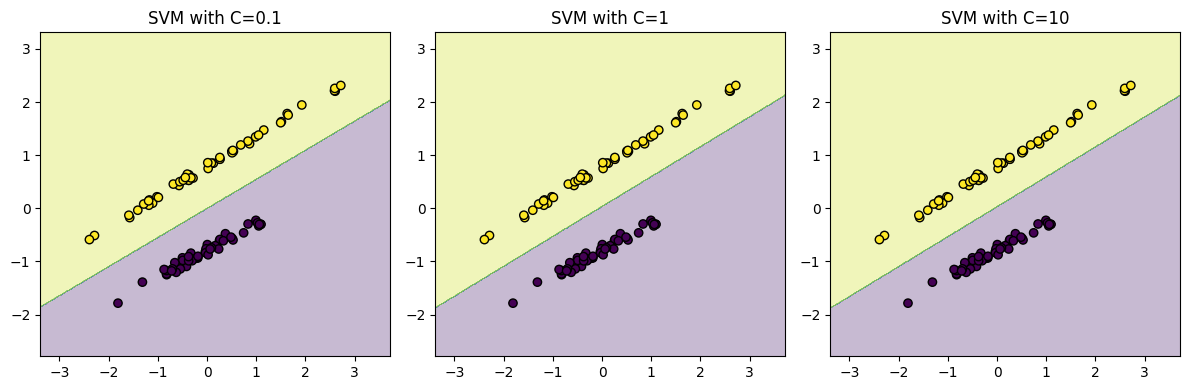

In [ ]:
# 21. Write a Python program to train an SVM Classifier with different C values and compare the decision boundaries visually


import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.preprocessing import StandardScaler

# Load dataset
X, y = datasets.make_classification(n_features=2, n_redundant=0, n_informative=2,
                                    n_clusters_per_class=1, n_samples=100, random_state=42)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define SVM classifiers with different C values
C_values = [0.1, 1, 10]
models = [svm.SVC(kernel='linear', C=C).fit(X, y) for C in C_values]

# Plot decision boundaries
plt.figure(figsize=(12, 4))
for i, model in enumerate(models):
    plt.subplot(1, 3, i + 1)
    plt.title(f"SVM with C={C_values[i]}")
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.tight_layout()
plt.show()

In [ ]:
# 22. Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features

from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
import numpy as np

# Generate binary feature dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
                           n_redundant=5, random_state=42)
X = (X > 0).astype(int)  # Binarize features

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Bernoulli Naive Bayes
model = BernoulliNB()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Accuracy: 0.73


In [ ]:
# 23. Write a Python program to apply feature scaling before training an SVM model and compare results with unscaled data


from sklearn import svm
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_iris(return_X_y=True)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Without scaling
model_unscaled = svm.SVC()
model_unscaled.fit(X_train, y_train)
pred_unscaled = model_unscaled.predict(X_test)
acc_unscaled = accuracy_score(y_test, pred_unscaled)

# With scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = svm.SVC()
model_scaled.fit(X_train_scaled, y_train)
pred_scaled = model_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, pred_scaled)

print(f"Accuracy without scaling: {acc_unscaled:.2f}")
print(f"Accuracy with scaling: {acc_scaled:.2f}")

Accuracy without scaling: 1.00
Accuracy with scaling: 1.00


In [ ]:
# 24. Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and after Laplace Smoothing


from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_iris(return_X_y=True)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# GaussianNB without smoothing (default)
model_default = GaussianNB()
model_default.fit(X_train, y_train)
pred_default = model_default.predict(X_test)
acc_default = accuracy_score(y_test, pred_default)

# GaussianNB with var_smoothing parameter
model_smoothed = GaussianNB(var_smoothing=1e-9)
model_smoothed.fit(X_train, y_train)
pred_smoothed = model_smoothed.predict(X_test)
acc_smoothed = accuracy_score(y_test, pred_smoothed)

print(f"Accuracy without smoothing: {acc_default:.2f}")
print(f"Accuracy with smoothing: {acc_smoothed:.2f}")

Accuracy without smoothing: 0.98
Accuracy with smoothing: 0.98


In [ ]:
# 25. Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C, gamma, kernel)


from sklearn import svm
from sklearn.datasets import load_wine
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_wine(return_X_y=True)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf']
}

# GridSearchCV
grid = GridSearchCV(svm.SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)

# Best model evaluation
best_model = grid.best_estimator_
pred = best_model.predict(X_test)
acc = accuracy_score(y_test, pred)

print(f"Best Parameters: {grid.best_params_}")
print(f"Test Accuracy: {acc:.2f}")

Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Test Accuracy: 1.00


In [ ]:
# 26. Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and check if it improves accuracy


from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2,
                           weights=[0.9, 0.1], flip_y=0, random_state=42)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Without class weighting
model = svm.SVC()
model.fit(X_train, y_train)
pred = model.predict(X_test)
acc = accuracy_score(y_test, pred)

# With class weighting
model_weighted = svm.SVC(class_weight='balanced')
model_weighted.fit(X_train, y_train)
pred_weighted = model_weighted.predict(X_test)
acc_weighted = accuracy_score(y_test, pred_weighted)

print(f"Accuracy without class weight: {acc:.2f}")
print(f"Accuracy with class weight: {acc_weighted:.2f}")

Accuracy without class weight: 0.94
Accuracy with class weight: 0.92


In [ ]:
# 27. Write a Python program to implement a Naïve Bayes classifier for spam detection using email data


from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

# Load dataset
categories = ['rec.sport.hockey', 'sci.space']
newsgroups = fetch_20newsgroups(subset='all', categories=categories)
X, y = newsgroups.data, newsgroups.target

# Vectorize text
vectorizer = CountVectorizer()
X_vect = vectorizer.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.3, random_state=42)

# Train MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)

# Evaluate
pred = model.predict(X_test)
acc = accuracy_score(y_test, pred)
print(f"Accuracy: {acc:.2f}")

Accuracy: 1.00


In [ ]:
# 28. Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and compare their accuracy


from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SVM Classifier
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)

# Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred)

print(f"SVM Accuracy: {svm_acc:.2f}")
print(f"Naive Bayes Accuracy: {nb_acc:.2f}")

SVM Accuracy: 0.94
Naive Bayes Accuracy: 0.94


In [ ]:
# 29. Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare results

from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_wine(return_X_y=True)

# Feature selection (top 5 features)
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

# Split original data
X_train_full, X_test_full, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Split selected feature data
X_train_sel, X_test_sel, _, _ = train_test_split(X_new, y, test_size=0.3, random_state=42)

# Train Naive Bayes on full feature set
model_full = GaussianNB()
model_full.fit(X_train_full, y_train)
acc_full = accuracy_score(y_test, model_full.predict(X_test_full))

# Train Naive Bayes on selected features
model_sel = GaussianNB()
model_sel.fit(X_train_sel, y_train)
acc_sel = accuracy_score(y_test, model_sel.predict(X_test_sel))

print(f"Accuracy with all features: {acc_full:.2f}")
print(f"Accuracy with selected features: {acc_sel:.2f}")

Accuracy with all features: 1.00
Accuracy with selected features: 0.94


In [ ]:
# 30. Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO) strategies on the Wine dataset and compare their accuracy

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_wine(return_X_y=True)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# One-vs-Rest
ovr = OneVsRestClassifier(SVC())
ovr.fit(X_train, y_train)
ovr_pred = ovr.predict(X_test)
ovr_acc = accuracy_score(y_test, ovr_pred)

# One-vs-One
ovo = OneVsOneClassifier(SVC())
ovo.fit(X_train, y_train)
ovo_pred = ovo.predict(X_test)
ovo_acc = accuracy_score(y_test, ovo_pred)

print(f"One-vs-Rest Accuracy: {ovr_acc:.2f}")
print(f"One-vs-One Accuracy: {ovo_acc:.2f}")

One-vs-Rest Accuracy: 0.72
One-vs-One Accuracy: 0.80


In [ ]:
# 31. Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast Cancer dataset and compare their accuracy


from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Kernels
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    print(f"{kernel.capitalize()} Kernel Accuracy: {acc:.2f}")

Linear Kernel Accuracy: 0.96
Poly Kernel Accuracy: 0.94
Rbf Kernel Accuracy: 0.94


In [ ]:
# 32. Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the average accuracy

from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVC

# Load dataset
X, y = load_iris(return_X_y=True)

# Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = SVC()

# Cross-validation
scores = cross_val_score(model, X, y, cv=skf)
print(f"Average Accuracy: {scores.mean():.2f}")

Average Accuracy: 0.97


In [ ]:
# 33. Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare performance


from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_iris(return_X_y=True)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Default priors
model_default = GaussianNB()
model_default.fit(X_train, y_train)
pred_default = model_default.predict(X_test)
acc_default = accuracy_score(y_test, pred_default)

# Custom priors
model_custom = GaussianNB(priors=[0.3, 0.3, 0.4])
model_custom.fit(X_train, y_train)
pred_custom = model_custom.predict(X_test)
acc_custom = accuracy_score(y_test, pred_custom)

print(f"Default Priors Accuracy: {acc_default:.2f}")
print(f"Custom Priors Accuracy: {acc_custom:.2f}")

Default Priors Accuracy: 0.98
Custom Priors Accuracy: 0.98


In [ ]:
# 34. Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and compare accuracy

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_wine(return_X_y=True)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Without RFE
model = SVC(kernel='linear')
model.fit(X_train, y_train)
pred = model.predict(X_test)
acc = accuracy_score(y_test, pred)

# With RFE (using linear SVC for feature importance)
rfe_model = SVC(kernel='linear')
rfe = RFE(estimator=rfe_model, n_features_to_select=5)
rfe.fit(X_train, y_train)

# Apply same transformation to test set
X_test_rfe = rfe.transform(X_test)
X_train_rfe = rfe.transform(X_train)

# Retrain model on selected features
model_rfe = SVC(kernel='linear')
model_rfe.fit(X_train_rfe, y_train)
pred_rfe = model_rfe.predict(X_test_rfe)
acc_rfe = accuracy_score(y_test, pred_rfe)

print(f"Accuracy without RFE: {acc:.2f}")
print(f"Accuracy with RFE: {acc_rfe:.2f}")


Accuracy without RFE: 0.98
Accuracy with RFE: 0.96


In [ ]:
# 35. Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and F1-Score instead of accuracy


from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = SVC()
model.fit(X_train, y_train)
pred = model.predict(X_test)

# Evaluation
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Precision: 0.91
Recall: 1.00
F1-Score: 0.95


In [ ]:
# 36. Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss (Cross-Entropy Loss)


from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss

# Load dataset
X, y = load_iris(return_X_y=True)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = GaussianNB()
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)

# Evaluation
loss = log_loss(y_test, probs)
print(f"Log Loss: {loss:.2f}")

Log Loss: 0.05


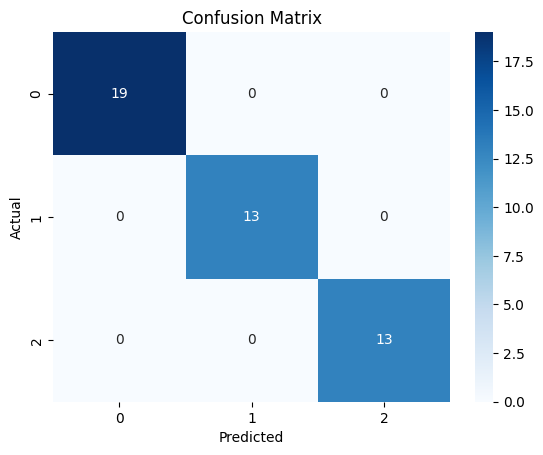

In [ ]:
# 37. Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn


import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Load dataset
X, y = load_iris(return_X_y=True)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = SVC()
model.fit(X_train, y_train)
pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# 38. Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute Error (MAE) instead of MSE


from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

# Load dataset
X, y = fetch_california_housing(return_X_y=True)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = SVR()
model.fit(X_train, y_train)
pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, pred)
print(f"Mean Absolute Error: {mae:.2f}")

Mean Absolute Error: 0.87


In [ ]:
# 39. Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC score


from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = GaussianNB()
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)[:, 1]

# Evaluation
roc_auc = roc_auc_score(y_test, probs)
print(f"ROC-AUC Score: {roc_auc:.2f}")

ROC-AUC Score: 0.99


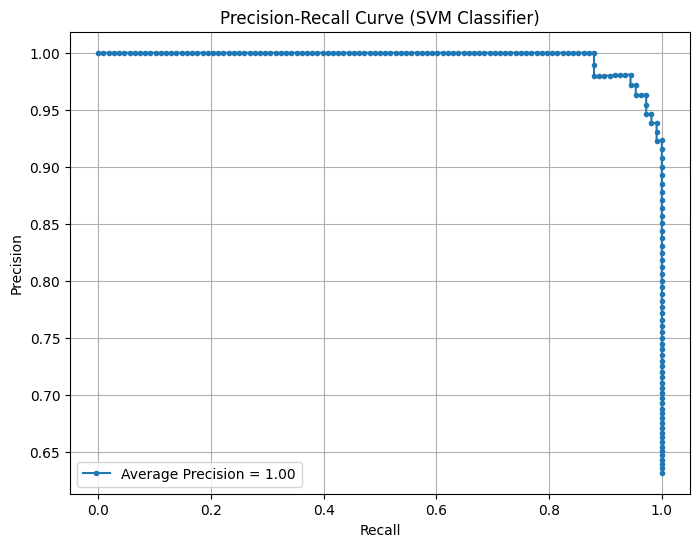

In [ ]:
# 40. Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, average_precision_score

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM model (with probability=True for PR curve)
model = SVC(kernel='rbf', probability=True)
model.fit(X_train, y_train)

# Get predicted probabilities for the positive class
probs = model.predict_proba(X_test)[:, 1]

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, probs)
ap_score = average_precision_score(y_test, probs)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'Average Precision = {ap_score:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (SVM Classifier)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# 41. Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C, gamma, kernel)

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

# Load dataset
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.01, 0.1],
    'kernel': ['linear', 'rbf']
}

# Grid search
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print(f"Best Accuracy: {grid.best_score_:.2f}")

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best Accuracy: 0.96


In [ ]:
# 42. Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and check if it improves accuracy

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Generate imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_classes=2, weights=[0.9, 0.1], random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Without class weighting
model_no_weight = SVC()
model_no_weight.fit(X_train, y_train)
pred_no_weight = model_no_weight.predict(X_test)
acc_no_weight = accuracy_score(y_test, pred_no_weight)

# With class weighting
model_weighted = SVC(class_weight='balanced')
model_weighted.fit(X_train, y_train)
pred_weighted = model_weighted.predict(X_test)
acc_weighted = accuracy_score(y_test, pred_weighted)

print(f"Accuracy without Class Weights: {acc_no_weight:.2f}")
print(f"Accuracy with Class Weights: {acc_weighted:.2f}")

Accuracy without Class Weights: 0.96
Accuracy with Class Weights: 0.94


In [ ]:
# 43. Write a Python program to implement a Naïve Bayes classifier for spam detection using email data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

# Load the dataset (SMS Spam Collection - tab-separated)
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'text'])

# Convert labels to binary values
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Vectorize text data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text'])
y = df['label']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Naïve Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict and evaluate
pred = model.predict(X_test)
acc = accuracy_score(y_test, pred)

print(f"Spam Detection Accuracy: {acc:.2f}")


Spam Detection Accuracy: 0.99


In [ ]:
# 44. Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and compare their accuracy

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SVM
svm = SVC()
svm.fit(X_train, y_train)
svm_acc = accuracy_score(y_test, svm.predict(X_test))

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_acc = accuracy_score(y_test, nb.predict(X_test))

print(f"SVM Accuracy: {svm_acc:.2f}")
print(f"Naive Bayes Accuracy: {nb_acc:.2f}")

SVM Accuracy: 0.76
Naive Bayes Accuracy: 1.00


In [ ]:
# 45. Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare results

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Without feature selection
model = GaussianNB()
model.fit(X_train, y_train)
acc_no_fs = accuracy_score(y_test, model.predict(X_test))

# With feature selection
selector = SelectKBest(score_func=f_classif, k=5)
X_train_fs = selector.fit_transform(X_train, y_train)
X_test_fs = selector.transform(X_test)
model_fs = GaussianNB()
model_fs.fit(X_train_fs, y_train)
acc_fs = accuracy_score(y_test, model_fs.predict(X_test_fs))

print(f"Accuracy without Feature Selection: {acc_no_fs:.2f}")
print(f"Accuracy with Feature Selection: {acc_fs:.2f}")

Accuracy without Feature Selection: 1.00
Accuracy with Feature Selection: 0.94


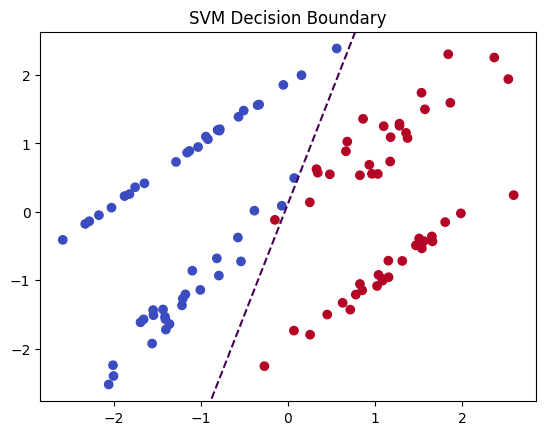

In [ ]:
# 46. Write a Python program to train an SVM Classifier and visualize the decision boundary

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC

# Generate dataset
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_redundant=0, random_state=42)

# Train SVM
model = SVC(kernel='linear')
model.fit(X, y)

# Plot decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')

# Create grid
xlim = plt.xlim()
ylim = plt.ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 200), np.linspace(ylim[0], ylim[1], 200))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, levels=[0], linestyles=['--'])
plt.title("SVM Decision Boundary")
plt.show()